In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [45]:
df= pd.read_csv("C:\\Users\\msi\\Downloads\\Reliancestock.csv", encoding= 'latin-1')

In [48]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,First_diff
0,03-01-2000,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.110000e+14,NaN
1,04-01-2000,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500000e+14,20.15
2,05-01-2000,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.370000e+14,10.65
3,06-01-2000,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.630000e+14,11.85
4,07-01-2000,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.140000e+14,20.20


In [49]:
df['Date'] = pd.to_datetime(df.Date)
df.set_index("Date", drop=False, inplace=True)

In [50]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,First_diff
Date,,,,,,,,,,,,,
2000-03-01,2000-03-01,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.110000e+14,NaN
2000-04-01,2000-04-01,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500000e+14,20.15
2000-05-01,2000-05-01,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.370000e+14,10.65
2000-06-01,2000-06-01,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.630000e+14,11.85
2000-07-01,2000-07-01,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.140000e+14,20.20


In [51]:
df.reset_index(drop=True, inplace=True)
lag_features = ["High", "Low", "Volume", "Turnover","Close"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]
    
df.fillna(df.mean(), inplace=True)

df.set_index("Date", drop=False, inplace=True)
df.head()

<ipython-input-51-21a78397ba77>:28: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover_mean_lag30,Turnover_std_lag3,Turnover_std_lag7,Turnover_std_lag30,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-01,2000-03-01,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,...,6.040598e+14,1.779820e+14,2.185188e+14,2.759739e+14,1010.799927,1010.161926,1006.544128,14.784642,22.771217,47.599812
2000-04-01,2000-04-01,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,...,1.110000e+14,1.779820e+14,2.185188e+14,2.759739e+14,251.699997,251.699997,251.699997,14.784642,22.771217,47.599812
2000-05-01,2000-05-01,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,...,1.805000e+14,9.828784e+13,9.828784e+13,9.828784e+13,261.774994,261.774994,261.774994,14.248201,14.248201,14.248201
2000-06-01,2000-06-01,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,...,3.660000e+14,3.287263e+14,3.287263e+14,3.287263e+14,268.683319,268.683319,268.683319,15.642277,15.642277,15.642277
2000-07-01,2000-07-01,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,...,3.902500e+14,2.441359e+14,2.727507e+14,2.727507e+14,282.899994,275.100006,275.100006,11.255332,18.105661,18.105661


In [89]:
df["month"] = df.Date.dt.day
df["week"] = df.Date.dt.isocalendar().week
df["day"] = df.Date.dt.month
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-01,2000-03-01,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,...,1010.799927,1010.161926,1006.544128,14.784642,22.771217,47.599812,1,9,3,2
2000-04-01,2000-04-01,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,...,251.699997,251.699997,251.699997,14.784642,22.771217,47.599812,1,13,4,5
2000-05-01,2000-05-01,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,...,261.774994,261.774994,261.774994,14.248201,14.248201,14.248201,1,18,5,0
2000-06-01,2000-06-01,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,...,268.683319,268.683319,268.683319,15.642277,15.642277,15.642277,1,22,6,3
2000-07-01,2000-07-01,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,...,282.899994,275.100006,275.100006,11.255332,18.105661,18.105661,1,26,7,5


KeyError: ('Date', 'month', 'week', 'day', 'day_of_week')

In [53]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
X = df.First_diff
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.503396
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [96]:
df1 = df[["Close","High"]].rolling(window=2).mean()

df1 = df1.fillna(0)
df['Close_mean']=df1['Close']
df['High_mean']=df1['High']
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,month,week,day,day_of_week,Close_mean,High_mean
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-01,2000-03-01,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,...,1006.544128,14.784642,22.771217,47.599812,1,9,3,2,0.000,0.000
2000-04-01,2000-04-01,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,...,251.699997,14.784642,22.771217,47.599812,1,13,4,5,261.775,261.775
2000-05-01,2000-05-01,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,...,261.774994,14.248201,14.248201,14.248201,1,18,5,0,277.175,279.875
2000-06-01,2000-06-01,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,...,268.683319,15.642277,15.642277,15.642277,1,22,6,3,288.425,294.300
2000-07-01,2000-07-01,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,...,275.100006,11.255332,18.105661,18.105661,1,26,7,5,304.450,309.300


In [103]:
plt.rcParams["figure.figsize"] = (15, 10)
df.truncate(before=pd.Timestamp('2016-01-05'),
            after=pd.Timestamp('2016-01-10')).tail()

ValueError: truncate requires a sorted index

<AxesSubplot:xlabel='Date'>

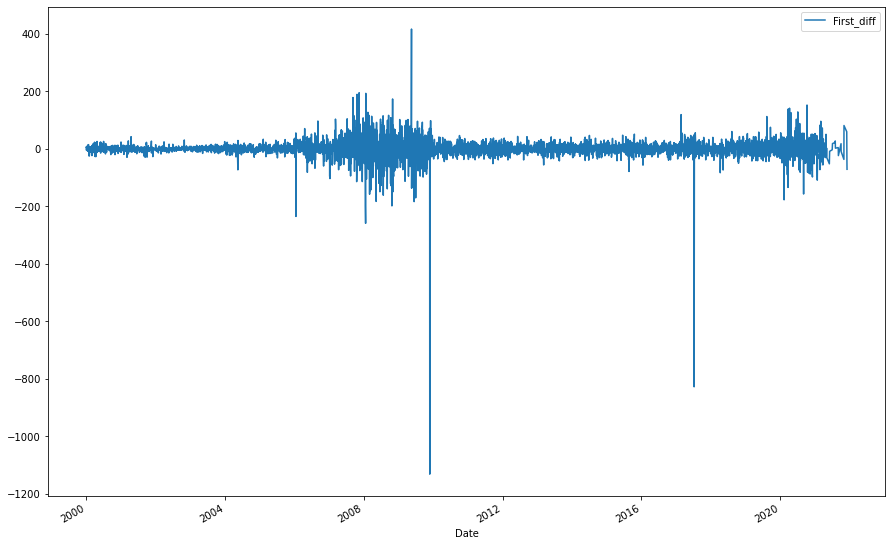

In [69]:
df.plot(x='Date',y='First_diff')

In [75]:
pip install plotly==4.10.0


  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=77df6fec121b110dc2806380b5db871da2024298357fb8a53de38bed2a67c5f6
  Stored in directory: c:\users\msi\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [88]:
import plotly.graph_objects as go
candlestick = go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)

fig = go.Figure(data=[candlestick])
 
fig.show()

In [78]:
pip install mplfinance


C:\Users\msi\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




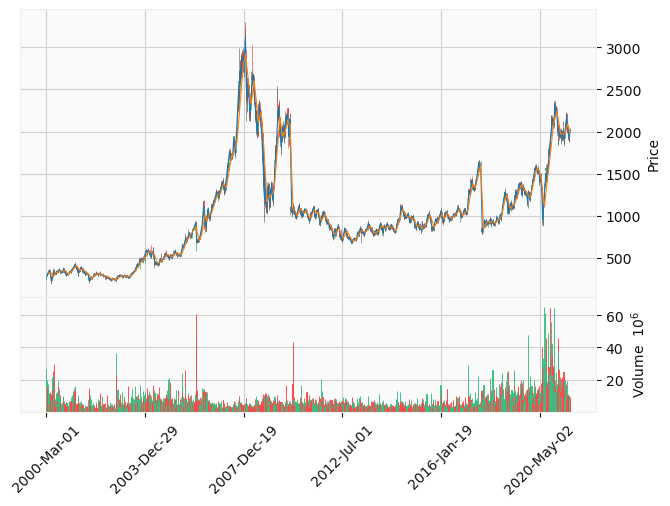

In [81]:
import mplfinance as mpf
mpf.plot(df, type='candle',mav=(7, 30),style='yahoo',volume=True)


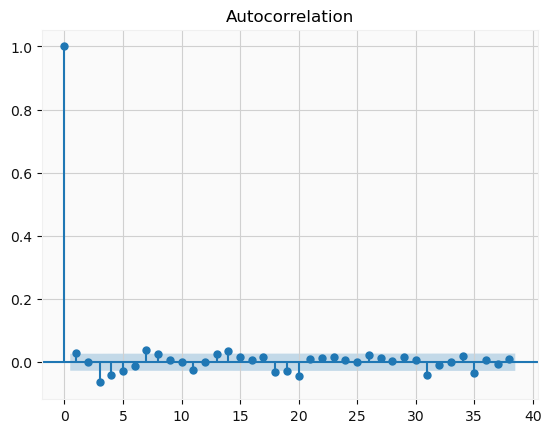

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
acf_plot = plot_acf(df.First_diff)


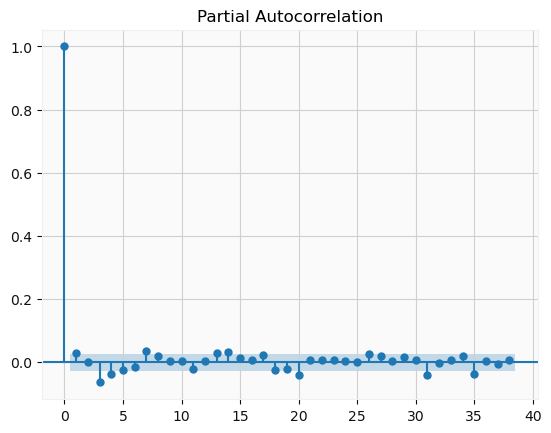

In [85]:
pacf_plot = plot_pacf(df.First_diff)